In [1]:
import os
import numpy as np
import pprint

import matplotlib.pyplot as plt
import time
import datetime

import pandas as pd
from __code import time_utility

from __code.images_and_metadata_extrapolation_matcher import ImagesAndMetadataExtrapolationMatcher

# Case 1 - file name information in both files

In [2]:
ascii1 = '/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/TESTING_SET/images_timestamp_infos.txt'
ascii2 = '/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/TESTING_SET/Sep_17_metadata_report_from_oncat.txt'

In [3]:
o_matcher = ImagesAndMetadataExtrapolationMatcher(ascii_file_1=ascii1, ascii_file_2=ascii2)

In [4]:
# pprint.pprint("ascii1")
# pprint.pprint(o_matcher.ascii_file_1_dataframe)

# print("")

# pprint.pprint("ascii2")
# pprint.pprint(o_matcher.ascii_file_2_dataframe)

In [5]:
pprint.pprint("Data merged")
pprint.pprint(o_matcher.get_merged_dataframe())

'Data merged'
                                           #filename  timestamp(s)  \
0  /Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...  1.537287e+09   
1  /Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...  1.537287e+09   
2  /Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...  1.537287e+09   
3  /Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...  1.537287e+09   
4  /Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...  1.537287e+09   
5  /Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...  1.537287e+09   
6  /Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...  1.537287e+09   
7  /Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...  1.537287e+09   
8  /Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...  1.537287e+09   

  timestamp_user_format_x  timeoffset(s) timestamp_user_format_y  \
0     2018-09-18 12:12:33            0.0     2018-09-17 21:50:51   
1     2018-09-18 12:12:57           24.0     2018-09-17 22:10:56   
2     2018-09-18 12:13:07           34.0     2018-09-17 22:50:55   
3     2018-09

# Case 2 - No filename information in one of the metadata

In [2]:
ascii1 = '/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/TESTING_SET/images_timestamp_infos.txt'
ascii3 = '/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/TESTING_SET/A49_3_at80C_4p1mm_120s_2_03_OCV_C03_2columns.txt'


In [3]:
o_matcher = ImagesAndMetadataExtrapolationMatcher(ascii_file_1=ascii1, ascii_file_2=ascii3)

In [11]:
# print("ascii1")
# print(o_matcher.ascii_file_1_dataframe)

In [12]:
# print("\nascii2")
# print(o_matcher.ascii_file_2_dataframe)

In [14]:
ascii_file_1_dataframe = o_matcher.ascii_file_1_dataframe
ascii_file_1_dataframe.set_index('timestamp_user_format')

ascii_file_2_dataframe = o_matcher.ascii_file_2_dataframe
ascii_file_2_dataframe.set_index("timestamp_user_format");

In [15]:
merged_dataframe = pd.merge(ascii_file_1_dataframe, ascii_file_2_dataframe, on="timestamp_user_format", how="outer")
merged_dataframe.sort_values(by='timestamp_user_format', inplace=True)
merged_dataframe = merged_dataframe.reset_index(drop=True)
merged_dataframe


,#filename,timestamp(s),timestamp_user_format,timeoffset(s),Unnamed: 0,TimeStamp,Voltage
0,NaN,NaN,2018-09-18 12:10:35,NaN,0.0,1.536357e+09,1.0
1,NaN,NaN,2018-09-18 12:10:45,NaN,1.0,1.536357e+09,2.0
2,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:12:33,0.0,NaN,NaN,NaN
3,NaN,NaN,2018-09-18 12:12:40,NaN,2.0,1.536357e+09,3.0
4,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:12:57,24.0,NaN,NaN,NaN
5,NaN,NaN,2018-09-18 12:13:00,NaN,3.0,1.536357e+09,4.0
6,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:13:07,34.0,NaN,NaN,NaN
7,NaN,NaN,2018-09-18 12:13:09,NaN,4.0,1.536357e+09,5.0
8,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:13:11,38.0,NaN,NaN,NaN
9,NaN,NaN,2018-09-18 12:13:14,NaN,5.0,1.536357e+09,6.0


Ask which columns the user wants to extrapolate

In [16]:
list_columns = merged_dataframe.columns
list_columns

Index(['#filename', 'timestamp(s)', 'timestamp_user_format', 'timeoffset(s)',
       'Unnamed: 0', 'TimeStamp', 'Voltage'],
      dtype='object')

In [18]:
def get_first_metadata_and_index_value(index=-1, metadata_array=[], direction='left'):
    if direction == 'left':
        coeff = -1
    else:
        coeff = +1
        
    while (np.isnan(metadata_array[index])):
        index += coeff
        
        # if last file timestamp is > last metadata recorded, raise error
        if index >= len(metadata_array):
            raise ValueError("Not enough metadata to extrapolate value!")
        
    return [metadata_array[index], index]

In [31]:
import time
def convert_to_second(timestamp_value, timestamp_format="%Y-%m-%d %I:%M:%S"):
    d = datetime.datetime.strptime(timestamp_value, timestamp_format )
    return time.mktime(d.timetuple())    

In [65]:
def calculate_extrapolated_metadata(index=-1, metadata_array=[], timestamp_array=[]):
    
    print("calculate_extrapolated_metadata")
    print("metadata_array: {}".format(metadata_array))
    print("timestamp_array: {}".format(timestamp_array))
    
    [left_metadata_value, left_index] = get_first_metadata_and_index_value(index=index, 
                                                                           metadata_array=metadata_array,
                                                                           direction='left')
    [right_metadata_value, right_index] = get_first_metadata_and_index_value(index=index,
                                                                             metadata_array=metadata_array,
                                                                             direction='right')
    
    print("-> left_metadata_value: {}".format(left_metadata_value))
    print("-> left_index: {}".format(left_index))
    print("-> right_metadata_value: {}".format(right_metadata_value))
    print("-> right_index: {}".format(right_index))
    
    
    left_timestamp_s_format = convert_to_second(timestamp_array[left_index])
    right_timestamp_s_format = convert_to_second(timestamp_array[right_index])
    

    x_timestamp_s_format = convert_to_second(timestamp_array[index])
    
    extra_value = extrapolate_value(x=x_timestamp_s_format,
                                   x_left=left_timestamp_s_format,
                                   x_right=right_timestamp_s_format,
                                   y_left=left_metadata_value,
                                   y_right=right_metadata_value)
    return extra_value
    

In [66]:
def extrapolate_value(x=1, x_left=1, x_right=1, y_left=1, y_right=1):
    coeff = (float(y_right) - float(y_left)) / (float(x_right) - float(x_left))
    part1 = coeff * (float(x) - float(x_left))
    return part1 + float(y_left)

In [67]:
# let's pretend user selected 
columns_name_to_extrapolate = "Voltage"

metadata_array = merged_dataframe['Voltage']
timestamp_array = merged_dataframe['timestamp_user_format']

# pprint.pprint("metadata array")
# pprint.pprint(metadata_array)

new_metadata_array = []
for _index in np.arange(len(metadata_array)):
    
    _metadata_value = metadata_array[_index]
    if np.isnan(_metadata_value):
        _new_value = calculate_extrapolated_metadata(index=_index,
                                                    metadata_array=metadata_array,
                                                    timestamp_array=timestamp_array)
        break
    else:
        _new_value = _metadata_value
        
    new_metadata_array.append(_new_value)
   
# pprint.pprint("new metadata_array")
# pprint.pprint(new_metadata_array)
        

calculate_extrapolated_metadata
metadata_array: 0      1.0
1      2.0
2      NaN
3      3.0
4      NaN
5      4.0
6      NaN
7      5.0
8      NaN
9      6.0
10     7.0
11     8.0
12     NaN
13     9.0
14     NaN
15    10.0
16     NaN
17    11.0
18    12.0
19     NaN
20    13.0
Name: Voltage, dtype: float64
timestamp_array: 0     2018-09-18 12:10:35
1     2018-09-18 12:10:45
2     2018-09-18 12:12:33
3     2018-09-18 12:12:40
4     2018-09-18 12:12:57
5     2018-09-18 12:13:00
6     2018-09-18 12:13:07
7     2018-09-18 12:13:09
8     2018-09-18 12:13:11
9     2018-09-18 12:13:14
10    2018-09-18 12:13:20
11    2018-09-18 12:13:22
12    2018-09-18 12:13:25
13    2018-09-18 12:13:40
14    2018-09-18 12:13:45
15    2018-09-18 12:13:50
16    2018-09-18 12:14:05
17    2018-09-18 12:14:06
18    2018-09-18 12:14:15
19    2018-09-18 12:14:20
20    2018-09-18 12:14:28
Name: timestamp_user_format, dtype: object
-> left_metadata_value: 2.0
-> left_index: 1
-> right_metadata_value: 3.0
-> right_in

In [33]:
time_column = timestamp_array
time_column_s = [convert_to_second(_time, timestamp_format="%Y-%m-%d %I:%M:%S") for _time in time_column]

In [35]:
%matplotlib notebook

In [51]:
timestamp_with_voltage_known = ascii_file_2_dataframe['timestamp_user_format']
time_column_voltage_known = timestamp_with_voltage_known
time_column_s_known = [convert_to_second(_time, timestamp_format="%Y-%m-%d %I:%M:%S") for _time in time_column_voltage_known]
voltage_column = ascii_file_2_dataframe['Voltage']

In [52]:
time_column_voltage_unknown = ascii_file_1_dataframe['timestamp_user_format']
time_column_voltage_unknown = time_column_voltage_unknown
time_column_s_unknown = [convert_to_second(_time, timestamp_format="%Y-%m-%d %I:%M:%S") for _time in time_column_voltage_unknown]


<IPython.core.display.Javascript object>


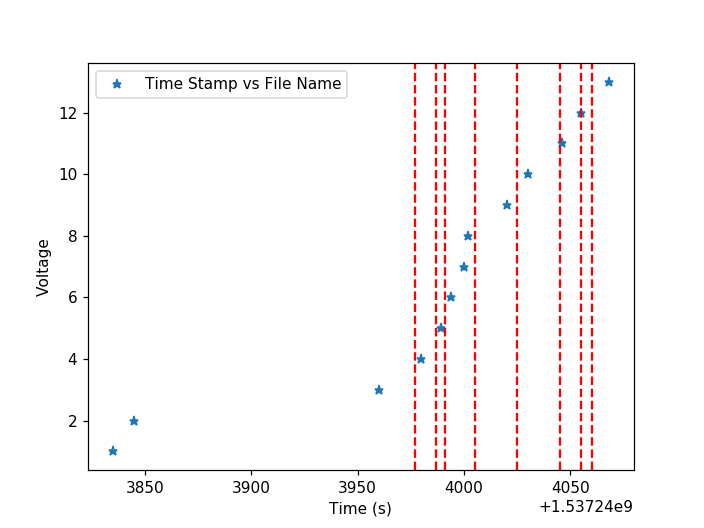

In [56]:
fig, ax = plt.subplots()
ax.plot(time_column_s_known, voltage_column, '*', label='Time Stamp vs File Name')
ax.set_xlabel("Time (s)")
ax.set_ylabel("Voltage")

for _vl in time_column_s_unknown[1:]:
    ax.axvline(x=_vl, color='r', linestyle='--')

#ax.plot(time_column_s, new_metadata_array, '+g')

#ax.axvline(x=time_column_s_unknown[0], color='r', linestyle='--', label="Regina's metadata")

ax.legend()


Metadata from Regina's data set retrieve

In [99]:
_dataframe3 = pd.read_csv(ascii3)
#_dataframe.set_index(INDEX)
_dataframe3

time_column = np.asarray(_dataframe3['time_user_format'])
data_column_ascii1 = np.asarray(_dataframe3['Voltage'])
#time_column
time_column_ascii1 = [get_seconds(_time) for _time in time_column]


TypeError: tuple indices must be integers or slices, not str

Data coming from file_name vs time stamp

In [39]:
_dataframe1 = pd.read_csv(ascii1)
#_dataframe.set_index(INDEX)
_dataframe1

,#filename,timestamp(s),timestamp_user_format,timeoffset(s)
0,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:12:33,0.0
1,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:12:57,24.0
2,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:13:07,34.0
3,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:13:11,38.0
4,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:13:25,52.0
5,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:13:45,72.0
6,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:14:05,92.0
7,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:14:15,102.0
8,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:14:29,116.0


In [6]:
time_column = np.asarray(_dataframe1[' timestamp_user_format'])
time_column_s = [get_seconds(_time, time_format="%Y-%m-%d %I:%M:%S") for _time in time_column]

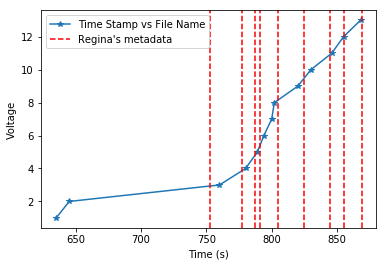

In [62]:
fig, ax = plt.subplots()
ax.plot(time_column_ascii1, data_column_ascii1, '*-', label='Time Stamp vs File Name')
ax.set_xlabel("Time (s)")
ax.set_ylabel("Voltage")

for _vl in time_column_s[1:]:
    ax.axvline(x=_vl, color='r', linestyle='--')

ax.axvline(x=time_column_s[0], color='r', linestyle='--', label="Regina's metadata")

ax.legend()


Checking the conversion of time/date units

In [60]:
format1 = "2018-09-18 12:12:7"
format1_reader = "%Y-%m-%d %I:%M:%S"
format2 = "09/18/2018 12:10:35"
format2_reader = "%m/%d/%Y %I:%M:%S"

In [96]:
a="dfdfdf"
type(a) is list

False

In [82]:
global_format = time.strptime(format1.strip(), format1_reader)

new_format = "{}/{}/{} {}:{}:{:}".format(global_format.tm_year,
                                        global_format.tm_mon,
                                        global_format.tm_mday,
                                        global_format.tm_hour,
                                        global_format.tm_min,
                                        global_format.tm_sec)
print("{} -> {}".format(format1, new_format))

2018-09-18 12:12:7 -> 2018/9/18 0:12:7


In [83]:
# global_format = time.strptime(format2.strip(), format2_reader)

# new_format = "{}/{}/{} {}:{}:{}".format(global_format.tm_year,
#                                         global_format.tm_mon,
#                                         global_format.tm_mday,
#                                         global_format.tm_hour,
#                                         global_format.tm_min,
#                                         global_format.tm_sec)
# print("{} -> {}".format(format2, new_format))

In [84]:
_dataframe1

,#filename,timestamp(s),timestamp_user_format,timeoffset(s)
0,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:12:33,0.0
1,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:12:57,24.0
2,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:13:7,34.0
3,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:13:11,38.0
4,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:13:25,52.0
5,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:13:45,72.0
6,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:14:5,92.0
7,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:14:15,102.0
8,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:14:29,116.0


In [85]:
def format_time(old_format):
    global_format = time.strptime(old_format.strip(), format1_reader)
    new_format = "{}/{}/{} {}:{}:{:02d}".format(global_format.tm_year,
                                        global_format.tm_mon,
                                        global_format.tm_mday,
                                        global_format.tm_hour,
                                        global_format.tm_min,
                                        global_format.tm_sec)
    return new_format

In [86]:
data1_dt = _dataframe1[' timestamp_user_format']
data1_dt

0    2018/9/18 0:12:33
1    2018/9/18 0:12:57
2     2018/9/18 0:13:7
3    2018/9/18 0:13:11
4    2018/9/18 0:13:25
5    2018/9/18 0:13:45
6     2018/9/18 0:14:5
7    2018/9/18 0:14:15
8    2018/9/18 0:14:29
Name:  timestamp_user_format, dtype: object

In [89]:
_dataframe1

,#filename,timestamp(s),timestamp_user_format,timeoffset(s)
0,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:12:33,0.0
1,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:12:57,24.0
2,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:13:7,34.0
3,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:13:11,38.0
4,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:13:25,52.0
5,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:13:45,72.0
6,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:14:5,92.0
7,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:14:15,102.0
8,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018/9/18 0:14:29,116.0


In [87]:
for _index, _date in enumerate(data1_dt):
    new_format = format_time(_date)
    data1_dt[_index] = new_format

ValueError: time data '2018/9/18 0:12:33' does not match format '%Y-%m-%d %I:%M:%S'

In [88]:
data1_dt

0    2018/9/18 0:12:33
1    2018/9/18 0:12:57
2     2018/9/18 0:13:7
3    2018/9/18 0:13:11
4    2018/9/18 0:13:25
5    2018/9/18 0:13:45
6     2018/9/18 0:14:5
7    2018/9/18 0:14:15
8    2018/9/18 0:14:29
Name:  timestamp_user_format, dtype: object

In [91]:
if "##filename" in _dataframe:
    print("yes")

In [8]:
o_matcher = ImagesAndMetadataExtrapolationMatcher(filename_vs_timestamp=ascii1,
                                                  metadata_ascii_file=ascii2)

output file

In [5]:
o_folder = SelectFolder(system=system, next_function=o_matcher.export_ascii)

In [6]:
import pandas as pd

In [7]:
pd_ascii1 = pd.read_csv(ascii1)
pd_ascii2 = pd.read_csv(ascii2)

In [44]:
pd_ascii1.set_index("#filename")

,timestamp(s),timestamp_user_format,timeoffset(s)
#filename,,,
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_5.tiff,1.537287e+09,2018-09-18 12:12:33,0.0
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_12.tiff,1.537287e+09,2018-09-18 12:12:57,24.0
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_8.tiff,1.537287e+09,2018-09-18 12:13:07,34.0
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_11.tiff,1.537287e+09,2018-09-18 12:13:11,38.0
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_9.tiff,1.537287e+09,2018-09-18 12:13:25,52.0
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_13.tiff,1.537287e+09,2018-09-18 12:13:45,72.0
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_7.tiff,1.537287e+09,2018-09-18 12:14:05,92.0
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_6.tiff,1.537287e+09,2018-09-18 12:14:15,102.0
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_10.tiff,1.537287e+09,2018-09-18 12:14:29,116.0


In [45]:
pd_ascii2.set_index("#filename")

,timestamp,MotCameraVert,MotCameraVert_RBV,MotDetTable,MotDetTable_RBV
#filename,,,,,
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_5.tiff,2018-09-17T21:50:50.978000-04:00,-51.699796,-51.699796,200.0,200.0
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_12.tiff,2018-09-17T14:10:56.662000-04:00,-51.699796,-51.699796,200.0,200.0
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_8.tiff,2018-09-17T22:50:55.203000-04:00,-51.699796,-51.699796,200.0,200.0
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_11.tiff,2018-09-17T22:50:56.283000-04:00,-51.699796,-51.699796,200.0,200.0
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_9.tiff,2018-09-17T18:50:58.244000-04:00,-51.699796,-51.699796,200.0,200.0
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_13.tiff,2018-09-17T15:41:00.793000-04:00,-51.699796,-51.699796,200.0,200.0
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_7.tiff,2018-09-17T20:50:52.539000-04:00,-51.699796,-51.699796,200.0,200.0
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_6.tiff,2018-09-17T16:40:57.966000-04:00,-51.699796,-51.699796,200.0,200.0
/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-20444-Regina/images/20180917_A49_4_at80C_4p1_120s_0120_10.tiff,2018-09-17T15:00:55.624000-04:00,-51.699796,-51.699796,200.0,200.0


In [95]:
merging_ascii = pd.merge(pd_ascii1, pd_ascii2, on='#filename', how='outer')
merging_ascii

,#filename,timestamp(s),timestamp_user_format,timeoffset(s),timestamp,MotCameraVert,MotCameraVert_RBV,MotDetTable,MotDetTable_RBV
0,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:12:33,0.0,2018-09-17T21:50:50.978000-04:00,-51.699796,-51.699796,200.0,200.0
1,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:12:57,24.0,2018-09-17T14:10:56.662000-04:00,-51.699796,-51.699796,200.0,200.0
2,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:13:07,34.0,2018-09-17T22:50:55.203000-04:00,-51.699796,-51.699796,200.0,200.0
3,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:13:11,38.0,2018-09-17T22:50:56.283000-04:00,-51.699796,-51.699796,200.0,200.0
4,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:13:25,52.0,2018-09-17T18:50:58.244000-04:00,-51.699796,-51.699796,200.0,200.0
5,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:13:45,72.0,2018-09-17T15:41:00.793000-04:00,-51.699796,-51.699796,200.0,200.0
6,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:14:05,92.0,2018-09-17T20:50:52.539000-04:00,-51.699796,-51.699796,200.0,200.0
7,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:14:15,102.0,2018-09-17T16:40:57.966000-04:00,-51.699796,-51.699796,200.0,200.0
8,/Volumes/my_book_thunderbolt_duo/IPTS/IPTS-204...,1.537287e+09,2018-09-18 12:14:29,116.0,2018-09-17T15:00:55.624000-04:00,-51.699796,-51.699796,200.0,200.0


In [1]:
timestamp1 = "2018-09-18 12:13:14"
timestamp2 = "2018/09/18 12:13:14"
timestamp3 = "18/09/2018 12:13:14"


In [3]:
o_time = time_utility.TimestampFormatter(timestamp=timestamp3)

In [4]:
o_time.format()

timestamp: 18/09/2018 12:13:14
input_time_format: %m/%d/%Y %I:%M:%S
timestamp: 18/09/2018 12:13:14
input_time_format: %Y-%m-%d %I:%M:%S
timestamp: 18/09/2018 12:13:14
input_time_format: %d/%m/%Y %I:%M:%S
time_dict: time.struct_time(tm_year=2018, tm_mon=9, tm_mday=18, tm_hour=0, tm_min=13, tm_sec=14, tm_wday=1, tm_yday=261, tm_isdst=-1)



'2018-09-18 00:13:14'

# Select Metadata Info to Keep 

**Allow users to define:**

 * reference_line_showing_end_of_metadata
 * start_of_data_after_how_many_lines_from_reference_line
 * index or label of time info column in big table

In [ ]:
o_meta = MetadataFileParser(filename=o_file.metadata_file, 
                            meta_type='mpt',
                            time_label='time/s',
                            reference_line_showing_end_of_metadata='Number of loops',
                            end_of_metadata_after_how_many_lines_from_reference_line=1)
o_meta.parse()

o_meta.select_data_to_keep()

# Select Output Folder and Filename of new Formated Metadata File

In [ ]:
o_meta.keep_only_columns_of_data_of_interest()
o_meta.select_output_location()

# Where to go Next 

Now, you probably want to run [this metadata_ascii_parser](./metadata_ascii_parser.ipynb) notebook in order to create a list of file names and their exact metadata values.